In [272]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [288]:
weather_data = np.load('weather.npz')['data']
traffic_data = np.load('../data/PEMS04.npz')['data']
adj_data = pd.read_csv('../data/PEMS04.csv')

# weather_data = weather_data[:,:,1:]
print(weather_data.shape)

(16992, 16)


In [262]:
# In order to work with scikit learn, each timestamp has to be listed as a 1d array (307*17, 307*3)
def unpack_data(data):
    return np.reshape(data, [data.shape[0], data.shape[1] * data.shape[2]])

def pack_data(data):
    return np.reshape(data, [data.shape[0], 307, -1])

In [4]:
def rmsle(y_actual, y_pred):
    log1 = np.nan_to_num(np.array([np.log1p(v) for v in y_pred]))
    log2 = np.nan_to_num(np.array([np.log1p(v) for v in y_actual]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

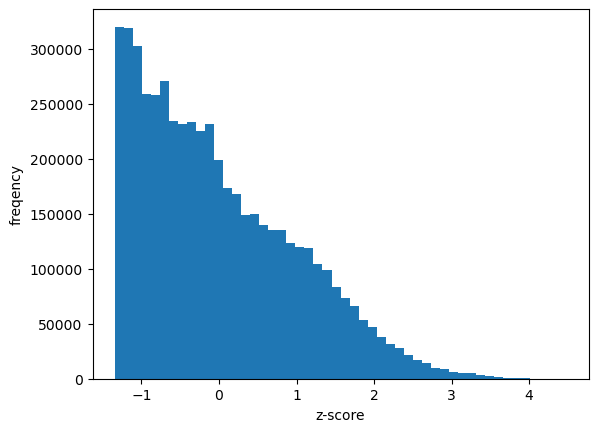

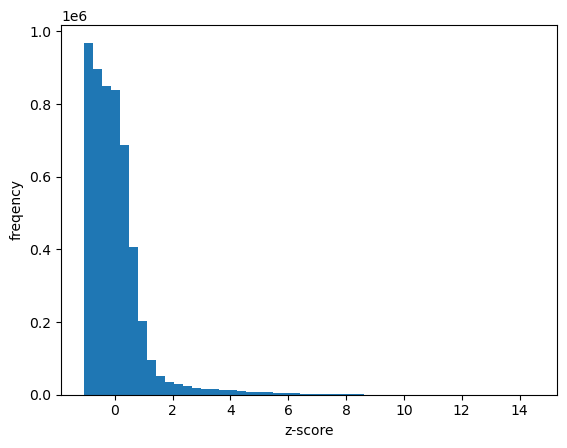

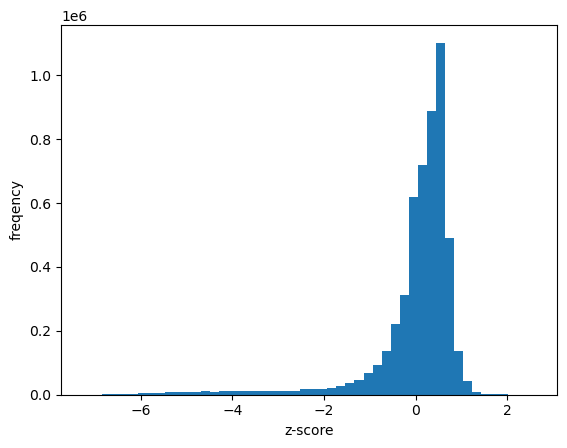

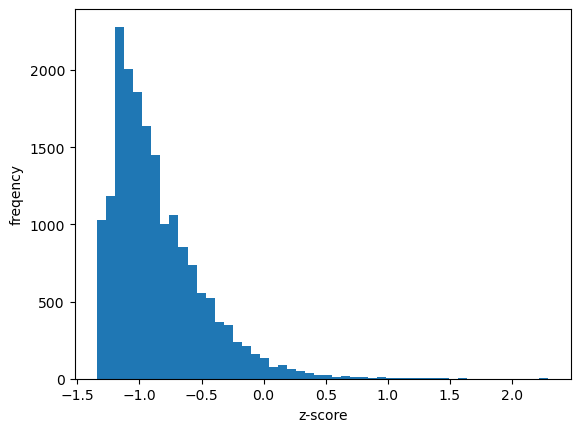

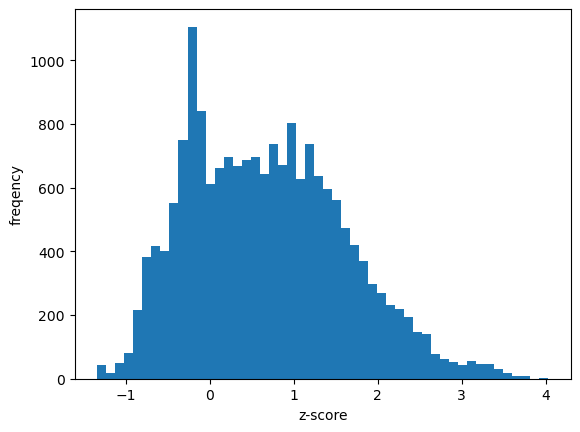

In [255]:
individual_vars = [traffic_data[:,:,i] for i in range(3)]
for i in range(3):
    y = individual_vars[i]
    y = (y - y.mean()) / y.std()
    plt.hist(y.flatten(), bins = 50)
    plt.xlabel('z-score')
    plt.ylabel('freqency')
#     plt.savefig(f'v{i + 1}-distribution.png')
    plt.show()
    
y = individual_vars[0]
y = (y - y.mean()) / y.std()
plt.hist(y[0::288].flatten(), bins = 50)
plt.xlabel('z-score')
plt.ylabel('freqency')
# plt.savefig(f'v2-night.png')
plt.show()

plt.hist(y[204::288].flatten(), bins = 50)
plt.xlabel('z-score')
plt.ylabel('freqency')
# plt.savefig(f'v2-day.png')
plt.show()

# Linear Regression

In [263]:
X = unpack_data(weather_data)
y = unpack_data(traffic_data)
train_X, test_X, train_y, test_y = train_test_split(X, y)
display(train_X.shape)
display(test_X.shape)
display(train_y.shape)
# display(test_y.shape)
# lr_model = LinearRegression(copy_X = True)
# lr_model.fit(train_X, train_y)
# lr_model.score(test_X, test_y)

(12744, 4912)

(4248, 4912)

(12744, 921)

## Individal Features

In [176]:
X = weather_data.mean(axis = 1)
for i in range(3):
    y = traffic_data[:,:,i]
    y = (y - y.mean())/(y.std())
    train_X, test_X, train_y, test_y = train_test_split(X, y)
    best_loss = 1000
    best_epoch = -1
    for i in range(5):
        lr_model = LinearRegression(copy_X = True)
        lr_model.fit(train_X, train_y)
        y_pred = lr_model.predict(test_X)
        
        mae = mean_absolute_error(test_y, y_pred)
        if mae < best_loss:
            best_loss = mae
            best_epoch = 1
    print(f'LOSS {best_loss} for epoch {i}')

LOSS 0.5529905114288355 for epoch 4
LOSS 0.5372438800258187 for epoch 4
LOSS 0.49231884815494387 for epoch 4


# Linear Regression w/ Means

## All features at once

In [169]:
X = weather_data.mean(axis = 1)
y = traffic_data.mean(axis = 1)
train_X, test_X, train_y, test_y = train_test_split(X, y)
display(train_X.shape)
display(test_X.shape)
display(train_y.shape)
display(test_y.shape)

(12744, 16)

(4248, 16)

(12744, 3)

(4248, 3)

0.2410060652437126

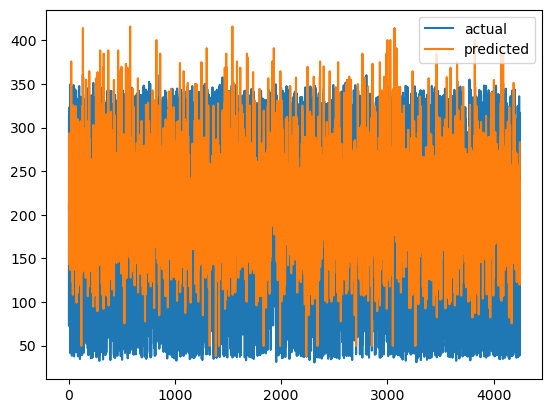

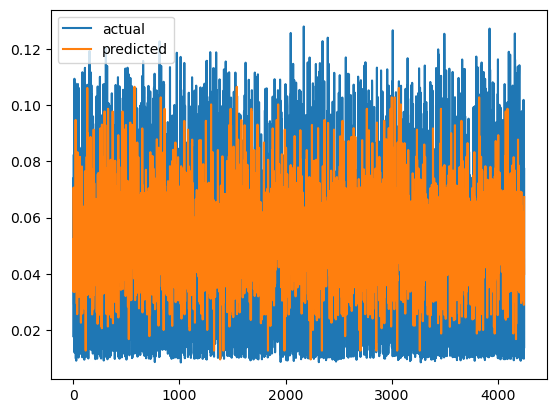

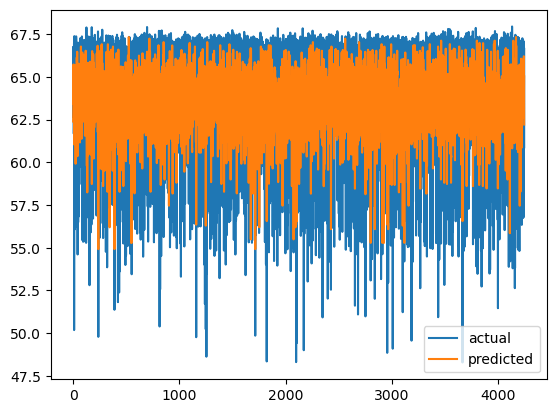

In [9]:
lr_model = LinearRegression(copy_X = True)
lr_model.fit(train_X, train_y)
pred_y = lr_model.predict(test_X)
display(lr_model.score(test_X, test_y))
for i in range(3):
    
    plt.plot(test_y[:,i], label = 'actual')
    plt.plot(pred_y[:,i], label = 'predicted')
    plt.legend()
    plt.show()

## Individually per feature

In [180]:
X = weather_data.mean(axis = 1)
y = traffic_data.mean(axis = 1)
y1, y2, y3 = y[:,0], y[:,1], y[:,2]

for y in [y1, y2, y3]:
    y = (y - y.mean())/(y.std())
    train_X, test_X, train_y, test_y = train_test_split(X, y)
    lr_model = LinearRegression(copy_X = True)
    lr_model.fit(train_X, train_y)
    
    best_loss = 1000
    best_epoch = -1
    for i in range(5):
        lr_model = LinearRegression(copy_X = True)
        lr_model.fit(train_X, train_y)
        y_pred = lr_model.predict(test_X)
        
        mae = mean_absolute_error(test_y, y_pred)
        if mae < best_loss:
            best_loss = mae
            best_epoch = 1
    print(f'LOSS {best_loss} for epoch {i}')

LOSS 0.7231243972722828 for epoch 4
LOSS 0.7274295417092269 for epoch 4
LOSS 0.7123610271419222 for epoch 4


# SVM w/ Individual Features

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

parameters = [{'kernel': ['poly'], 'degree': [10], 'coef0': [1], 'C': [0.1, 1, 10]}]
#parameters = [{'kernel': ['poly'], 'degree': [2, 3, 10], 'coef0': [1], 'C': [0.1, 1, 10, 100]}]

X = weather_data.mean(axis = 1)
# for i in range(3):
#     y = traffic_data.mean(axis = 1)[:,i]
#     train_X, test_X, train_y, test_y = train_test_split(X, y)
#     display(train_X.shape)
#     display(test_X.shape)
#     display(train_y.shape)
#     display(test_y.shape)
#     clf = GridSearchCV(SVR(), parameters, scoring = 'explained_variance')
#     clf.fit(train_X, train_y)
    
#     print(f'Best parameters: {clf.best_params_}')
#     pred_y = clf.predict(test_X)
#     display(clf.score(test_X, test_y))
#     plt.plot(test_y, label = 'actual')
#     plt.plot(pred_y, label = 'predicted')
#     plt.legend()
#     plt.show()

# Pytorch

In [278]:
import torch
import torch.nn as nn
from torch.nn.functional import normalize
from torch.optim import SGD
from torch.utils.data import TensorDataset, DataLoader
from torchmetrics import MeanAbsolutePercentageError

torch.set_default_dtype(torch.float64)

traffic_data_variables = [torch.from_numpy(traffic_data[:,:,i]) for i in range(traffic_data.shape[2])]

X = torch.from_numpy(weather_data[:,0])
means = X.mean(dim=0, keepdim=True)
stds = X.std(dim=0, keepdim=True)
X = (X - means) / stds
y1, y2, y3 = ((y - y.mean()) / y.std() for y in traffic_data_variables)

display(X)
np.savez_compressed('../data/weather.npz', data = X.numpy())

for i in range(3):
    y = traffic_data[:,:,i]
    y_n = (y - y.mean())/(y.std())
    flat = y_n.flatten()
    values = np.random.choice(flat, 50000) - np.random.choice(flat, 50000)
    print(f'average difference between two random samples for var {i} = {np.absolute(values).mean()}')
    
def generate_data():
    traffic_data_variables = [torch.from_numpy(traffic_data[:,:,i]) for i in range(traffic_data.shape[2])]

    X = torch.from_numpy(weather_data[:,0])
    means = X.mean(dim=0, keepdim=True)
    stds = X.std(dim=0, keepdim=True)
    X = (X - means) / stds
    y1, y2, y3 = ((y - y.mean()) / y.std() for y in traffic_data_variables)

tensor([[-0.0918,  0.9275, -0.1945,  ..., -0.4449, -0.1017, -0.2348],
        [-0.0918,  0.9275, -0.1945,  ..., -0.4449, -0.1017, -0.2348],
        [-0.0918,  0.9275, -0.1945,  ..., -0.4449, -0.1017, -0.2348],
        ...,
        [-0.2703,  0.9275,  1.2119,  ..., -0.4449,  9.8310, -0.2348],
        [-0.2703,  0.9275,  1.2119,  ..., -0.4449,  9.8310, -0.2348],
        [-0.2703,  0.9275,  1.2119,  ..., -0.4449,  9.8310, -0.2348]])

average difference between two random samples for var 0 = 1.1185283300248543
average difference between two random samples for var 1 = 0.9327979328670373
average difference between two random samples for var 2 = 0.8402926448170622


In [269]:
def train_epoch(model, train_loader, loss_function, optimizer):
    total_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        # Forward
        outputs = model(inputs)
        
        loss = loss_function(outputs, labels)
        
        loss.backward()
        
        optimizer.step()
        
        total_loss += loss
    
    avg_loss = total_loss / (i + 1)
    
    return avg_loss

def run_model(model, loss_function, optimizer, num_epochs):
    generate_data()
    best_params = []
    for y in [y1, y2, y3]:
        # Prepare data and necessary functions
        train_X, test_X, train_y, test_y = train_test_split(X, y)

        model = model

        training_dataset = TensorDataset(train_X, train_y)
        testing_dataset = TensorDataset(test_X, test_y)
#         print('Training set has {} instances'.format(len(training_dataset)))
#         print('Testing set has {} instances'.format(len(testing_dataset)))

        train_loader = DataLoader(training_dataset, shuffle = True)
        test_loader = DataLoader(testing_dataset, shuffle = True)

        loss_function = loss_function
        optimizer = optimizer
        
        best_loss = 1000
        best_tloss = 1000
        best_epoch = -1

        for epoch in range(1, num_epochs + 1):
            print(f'training and testing for epoch {epoch}', end = '\r')

            model.train(True)

            # Training
            avg_loss = train_epoch(model, train_loader, loss_function, optimizer)

            model.train(False)

            # Testing
            total_tloss = 0.0
            for i, data in enumerate(test_loader):
                inputs, labels = data
                outputs = model(inputs)
                loss = loss_function(outputs, labels)
                total_tloss += loss

            avg_tloss = total_tloss / (i + 1)
            
            if loss < best_loss:
                best_loss = avg_loss
                best_tloss = avg_tloss
                best_epoch = epoch
                
        
        print(f'LOSS train {best_loss} valid {best_tloss} for epoch {best_epoch}')
        best_params.append([best_loss, best_tloss, best_epoch])
    
    return best_params

# Feed-Forward Neural Networks

## No Hidden Layers

In [270]:
class Weather_Model_Basic(nn.Module):
    def __init__(self, input_features, output_features):
        super(Weather_Model_Basic, self).__init__()
        self.layer = nn.Linear(input_features, output_features)
        
    def forward(self, x):
        x = self.layer(x)
        return x

In [271]:
model = Weather_Model_Basic(16, 307)
loss_function = nn.L1Loss()
optimizer = SGD(model.parameters(), lr = 0.1)
run_model(model, loss_function, optimizer, 5)

LOSS train 0.542600634248939 valid 0.5552700516852056 for epoch 5
LOSS train 0.5057688779305543 valid 0.5118296300627163 for epoch 5
LOSS train 0.4365764358323529 valid 0.431189991088588 for epoch 5


[[tensor(0.5426, grad_fn=<DivBackward0>),
  tensor(0.5553, grad_fn=<DivBackward0>),
  5],
 [tensor(0.5058, grad_fn=<DivBackward0>),
  tensor(0.5118, grad_fn=<DivBackward0>),
  5],
 [tensor(0.4366, grad_fn=<DivBackward0>),
  tensor(0.4312, grad_fn=<DivBackward0>),
  5]]

In [216]:
class Weather_Model_Layered(nn.Module):
    def __init__(self, input_features, output_features, layers):
        super(Weather_Model_Layered, self).__init__()
        self.layers = []
        if layers == None or len(layers) == 0:
            self.layers.append(nn.Linear(input_features, output_features))
        else:
            self.layers.append(nn.Linear(input_features, layers[0]))
            for i in range(len(layers) - 1):
                self.layers.append(nn.Linear(layers[i], layers[i + 1]))
            self.layers.append(nn.Linear(layers[-1], output_features))
            
        self.layers = nn.ModuleList(self.layers)
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [228]:
hidden_layers = [[10], [50], [100], [10, 50], [16, 16]]
best_loss = [1000, 1000, 1000]
best_params_overall = [1, 1, 1]
for layer_list in hidden_layers:
    print(f'MODELING FOR {layer_list}')
    model = Weather_Model_Layered(16, 307, layer_list)
    loss_function = nn.L1Loss()
    optimizer = SGD(model.parameters(), lr = 0.1)
    best_params = run_model(model, loss_function, optimizer, 5)
    for i in range(3):
        if best_params[i][0] < best_loss[i]:
            best_params_overall[i] = [layer_list, best_params[i][0], best_params[i][1], best_params[i][2]]
            
for i in range(len(best_params_overall)):
    print(f'For var {i + 1}, best param is {best_params_overall[i][0]} with a training loss of {best_params_overall[i][1]} and testing loss of {best_params_overall[i][2]}')

MODELING FOR [10]
LOSS train 0.5493912920341621 valid 0.5633695488789308 for epoch 4
LOSS train 0.516106458778586 valid 0.49645113110486777 for epoch 3
LOSS train 0.4389294719225348 valid 0.4383660391637115 for epoch 5
MODELING FOR [50]
LOSS train 0.551285042616346 valid 0.5453576340372972 for epoch 5
LOSS train 0.5077696556961124 valid 0.5168820046789533 for epoch 5
LOSS train 0.4367826209694606 valid 0.4357003299944582 for epoch 5
MODELING FOR [100]
LOSS train 0.5510887361353658 valid 0.5465374900425699 for epoch 5
LOSS train 0.5107861039517693 valid 0.5054788176919746 for epoch 5
LOSS train 0.43700280130403973 valid 0.4349698301585295 for epoch 5
MODELING FOR [10, 50]
LOSS train 0.5535022526360251 valid 0.5534805561819692 for epoch 5
LOSS train 0.5107193190228363 valid 0.513691697888846 for epoch 5
LOSS train 0.4377570026114943 valid 0.43555516456908105 for epoch 5
MODELING FOR [16, 16]
LOSS train 0.5566439425724417 valid 0.5459118902534881 for epoch 5
LOSS train 0.5135556359505629 

# Cleaning and saving the weather data

In [299]:
weather_data = np.load('weather.npz')['data']
X = torch.from_numpy(weather_data)
display(X[:5])
means = X.mean(dim=0, keepdim=True)
stds = X.std(dim=0, keepdim=True)
display(X.shape)
X[:,:4] = ((X - means) / stds)[:,:4]
X[:,4] = X[:,4] / 10
display(X[:5])
np.savez_compressed('../data/weather.npz', data = X.numpy())

tensor([[53., 86.,  6.,  0., 10.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.],
        [53., 86.,  6.,  0., 10.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.],
        [53., 86.,  6.,  0., 10.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.],
        [53., 86.,  6.,  0., 10.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.],
        [53., 86.,  6.,  0., 10.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.]])

torch.Size([16992, 16])

tensor([[-0.0918,  0.9275, -0.1945, -0.1467,  1.0000,  1.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.0918,  0.9275, -0.1945, -0.1467,  1.0000,  1.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.0918,  0.9275, -0.1945, -0.1467,  1.0000,  1.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.0918,  0.9275, -0.1945, -0.1467,  1.0000,  1.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.0918,  0.9275, -0.1945, -0.1467,  1.0000,  1.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]])